# Question 3 and 4 (Run 3rd)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get final dataset after cleaning the file
# imported from Rides_SF in LyftBikeSharingQ1&2 after saving as a CSV
bike_sharing =  pd.read_csv('final_sf_rides_data.csv')
bike_sharing

,Unnamed: 0,Unnamed: 0.1,month,trip_duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,start_city,end_city,start_end_city
0,1,5,January,1188,34.0,Father Alfred E Boeddeker Park,146.0,30th St at San Jose Ave,5114,Subscriber,1984.0,Male,37.783988,-122.412408,37.742314,-122.423180,San Francisco,San Francisco,San Francisco / San Francisco
1,3,7,January,3153,29.0,O'Farrell St at Divisadero St,70.0,Central Ave at Fell St,4813,Subscriber,1979.0,Male,37.782405,-122.439446,37.773311,-122.444293,San Francisco,San Francisco,San Francisco / San Francisco
2,4,8,January,323,223.0,16th St Mission BART Station 2,129.0,Harrison St at 20th St,1976,Subscriber,1991.0,Male,37.764765,-122.420091,37.758862,-122.412544,San Francisco,San Francisco,San Francisco / San Francisco
3,6,10,January,272,349.0,Howard St at Mary St,60.0,8th St at Ringold St,263,Subscriber,1993.0,Male,37.781010,-122.405666,37.774520,-122.409449,San Francisco,San Francisco,San Francisco / San Francisco
4,7,11,January,547,77.0,11th St at Natoma St,349.0,Howard St at Mary St,3035,Subscriber,1988.0,Male,37.773507,-122.416040,37.781010,-122.405666,San Francisco,San Francisco,San Francisco / San Francisco
5,9,13,January,559,41.0,Golden Gate Ave at Polk St,52.0,McAllister St at Baker St,5019,Subscriber,1991.0,Female,37.781270,-122.418740,37.777416,-122.441838,San Francisco,San Francisco,San Francisco / San Francisco
6,11,15,January,731,81.0,Berry St at 4th St,323.0,Broadway at Kearny,5480,Subscriber,1959.0,Male,37.775880,-122.393170,37.798014,-122.405950,San Francisco,San Francisco,San Francisco / San Francisco
7,12,16,January,480,370.0,Jones St at Post St,21.0,Montgomery St BART Station (Market St at 2nd St),4960,Subscriber,1987.0,Male,37.787327,-122.413278,37.789625,-122.400811,San Francisco,San Francisco,San Francisco / San Francisco
8,13,17,January,252,121.0,Mission Playground,133.0,Valencia St at 22nd St,5257,Subscriber,1995.0,Male,37.759210,-122.421339,37.755213,-122.420975,San Francisco,San Francisco,San Francisco / San Francisco
9,14,18,January,376,25.0,Howard St at 2nd St,349.0,Howard St at Mary St,3649,Customer,1990.0,Male,37.787522,-122.397405,37.781010,-122.405666,San Francisco,San Francisco,San Francisco / San Francisco


## Part of Question 1a analysis

In [8]:
# no. of unique bikes
bike_sharing['bike_id'].nunique()

3360

In [9]:
# no. of unique stations
bike_sharing['start_station_id'].nunique()

169

## Part of Question 1a analysis ends

## Continued Q 3 & 4

## Further Data Cleaning
#### Drop Unnamed columns and start_end_city because finalised that scope of analysis is limited to San Francisco


In [10]:
# 1. drop Unnamed columns and start_end_city because we have San Franciso data
sf_stations = bike_sharing.drop(['Unnamed: 0','Unnamed: 0.1','start_end_city'],axis=1)
sf_stations

,month,trip_duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,start_city,end_city
0,January,1188,34.0,Father Alfred E Boeddeker Park,146.0,30th St at San Jose Ave,5114,Subscriber,1984.0,Male,37.783988,-122.412408,37.742314,-122.423180,San Francisco,San Francisco
1,January,3153,29.0,O'Farrell St at Divisadero St,70.0,Central Ave at Fell St,4813,Subscriber,1979.0,Male,37.782405,-122.439446,37.773311,-122.444293,San Francisco,San Francisco
2,January,323,223.0,16th St Mission BART Station 2,129.0,Harrison St at 20th St,1976,Subscriber,1991.0,Male,37.764765,-122.420091,37.758862,-122.412544,San Francisco,San Francisco
3,January,272,349.0,Howard St at Mary St,60.0,8th St at Ringold St,263,Subscriber,1993.0,Male,37.781010,-122.405666,37.774520,-122.409449,San Francisco,San Francisco
4,January,547,77.0,11th St at Natoma St,349.0,Howard St at Mary St,3035,Subscriber,1988.0,Male,37.773507,-122.416040,37.781010,-122.405666,San Francisco,San Francisco
5,January,559,41.0,Golden Gate Ave at Polk St,52.0,McAllister St at Baker St,5019,Subscriber,1991.0,Female,37.781270,-122.418740,37.777416,-122.441838,San Francisco,San Francisco
6,January,731,81.0,Berry St at 4th St,323.0,Broadway at Kearny,5480,Subscriber,1959.0,Male,37.775880,-122.393170,37.798014,-122.405950,San Francisco,San Francisco
7,January,480,370.0,Jones St at Post St,21.0,Montgomery St BART Station (Market St at 2nd St),4960,Subscriber,1987.0,Male,37.787327,-122.413278,37.789625,-122.400811,San Francisco,San Francisco
8,January,252,121.0,Mission Playground,133.0,Valencia St at 22nd St,5257,Subscriber,1995.0,Male,37.759210,-122.421339,37.755213,-122.420975,San Francisco,San Francisco
9,January,376,25.0,Howard St at 2nd St,349.0,Howard St at Mary St,3649,Customer,1990.0,Male,37.787522,-122.397405,37.781010,-122.405666,San Francisco,San Francisco


### Q3 Analysis of bike demand and supply
### Q3a TOP STATIONS based on Station usage (Frequency)

In [11]:
# Find the number of check-outs per station
station_start=sf_stations['start_station_name'].value_counts()
station_start.head(15)

San Francisco Caltrain Station 2  (Townsend St at 4th St)    19961
Market St at 10th St                                         19226
Berry St at 4th St                                           15985
San Francisco Ferry Building (Harry Bridges Plaza)           15727
Montgomery St BART Station (Market St at 2nd St)             15006
Powell St BART Station (Market St at 4th St)                 14685
San Francisco Caltrain (Townsend St at 4th St)               14235
Steuart St at Market St                                      13088
Powell St BART Station (Market St at 5th St)                 12914
Howard St at Beale St                                        12341
The Embarcadero at Sansome St                                11663
2nd St at Townsend St                                        10108
3rd St at Townsend St                                         9586
Beale St at Harrison St                                       9444
Embarcadero BART Station (Beale St at Market St)              

In [12]:
# Find the number of check-ins per station
station_end=sf_stations['end_station_name'].value_counts()
station_end

San Francisco Caltrain Station 2  (Townsend St at 4th St)          29032
Market St at 10th St                                               19235
Montgomery St BART Station (Market St at 2nd St)                   18967
San Francisco Ferry Building (Harry Bridges Plaza)                 18805
Berry St at 4th St                                                 15346
Powell St BART Station (Market St at 4th St)                       15303
San Francisco Caltrain (Townsend St at 4th St)                     14300
The Embarcadero at Sansome St                                      13521
Steuart St at Market St                                            13308
Powell St BART Station (Market St at 5th St)                       13092
Howard St at Beale St                                              11203
2nd St at Townsend St                                              10324
Civic Center/UN Plaza BART Station (Market St at McAllister St)     9915
Beale St at Harrison St                            

## Create a dataframe with added columns

In [13]:
# Create a DataFrame with the check-outs and check-ins
# Create a column that sums check-outs and check-ins
# Create a column to get difference of check in - check out
station_counts = pd.concat([station_start, station_end], axis=1)
station_counts.rename(columns={'start_station_name':'Check_out', 'end_station_name':'Check_in'}, inplace=True)
station_counts['Total'] = station_counts['Check_out'] + station_counts['Check_in']
station_counts['CheckIn-CheckOut'] = station_counts['Check_in']- station_counts['Check_out']

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [14]:
# arrange in descending order to get top stations
station_counts = station_counts.sort_values('Total', ascending=False)


In [15]:
# top stations = total number of rides > 25000
top_stations= station_counts[station_counts['Total']>25000]
top_stations

,Check_out,Check_in,Total,CheckIn-CheckOut
San Francisco Caltrain Station 2 (Townsend St at 4th St),19961,29032,48993,9071
Market St at 10th St,19226,19235,38461,9
San Francisco Ferry Building (Harry Bridges Plaza),15727,18805,34532,3078
Montgomery St BART Station (Market St at 2nd St),15006,18967,33973,3961
Berry St at 4th St,15985,15346,31331,-639
Powell St BART Station (Market St at 4th St),14685,15303,29988,618
San Francisco Caltrain (Townsend St at 4th St),14235,14300,28535,65
Steuart St at Market St,13088,13308,26396,220
Powell St BART Station (Market St at 5th St),12914,13092,26006,178
The Embarcadero at Sansome St,11663,13521,25184,1858


In [16]:
top_stations['top_stations']= top_stations.index
top_stations.index = range(1,11)
top_stations = top_stations[['top_stations','Check_out','Check_in']]
top_stations

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,top_stations,Check_out,Check_in
1,San Francisco Caltrain Station 2 (Townsend St...,19961,29032
2,Market St at 10th St,19226,19235
3,San Francisco Ferry Building (Harry Bridges Pl...,15727,18805
4,Montgomery St BART Station (Market St at 2nd St),15006,18967
5,Berry St at 4th St,15985,15346
6,Powell St BART Station (Market St at 4th St),14685,15303
7,San Francisco Caltrain (Townsend St at 4th St),14235,14300
8,Steuart St at Market St,13088,13308
9,Powell St BART Station (Market St at 5th St),12914,13092
10,The Embarcadero at Sansome St,11663,13521


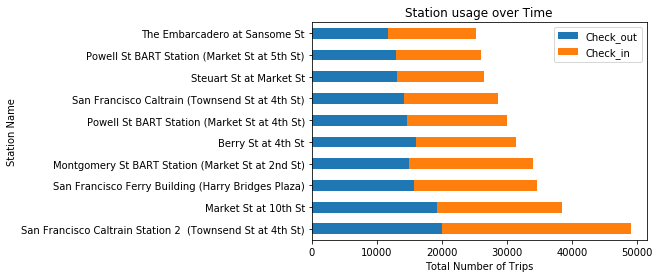

In [17]:
import matplotlib.pyplot as plt
top_stations.set_index('top_stations').plot(kind='barh', stacked=True)
plt.ylabel("Station Name")
plt.xlabel("Total Number of Trips")
plt.title("Station usage over Time");

### Q3b BIKE DEMAND & SUPPLY in SF based on station usage 
#### 1. If more bikescheck-in than check-out, implies bikes in excess
#### 2. If more bikes check-out than check-in, implies bikes in demand
#### Top 10 stations show excess bikes at that station, while the bottom 10 stations show they should be monitored for reloading.

In [18]:
# BIKE DEMAND
# arrange in descending order of difference
station_counts = station_counts.sort_values('CheckIn-CheckOut', ascending=False)
# 1. If more bikes check-in than check-out, implies bikes in excess
excess= station_counts.head(10)
excess

,Check_out,Check_in,Total,CheckIn-CheckOut
San Francisco Caltrain Station 2 (Townsend St at 4th St),19961,29032,48993,9071
Montgomery St BART Station (Market St at 2nd St),15006,18967,33973,3961
San Francisco Ferry Building (Harry Bridges Plaza),15727,18805,34532,3078
The Embarcadero at Sansome St,11663,13521,25184,1858
8th St at Brannan St,6385,7599,13984,1214
Civic Center/UN Plaza BART Station (Market St at McAllister St),8923,9915,18838,992
11th St at Bryant St,4470,5206,9676,736
Folsom St at 3rd St,5880,6556,12436,676
4th St at Mission Bay Blvd S,8533,9173,17706,640
Powell St BART Station (Market St at 4th St),14685,15303,29988,618


In [19]:
# 2. If more bikes check-out than check-in, implies bikes in demand
demand= station_counts.tail(10)
demand

,Check_out,Check_in,Total,CheckIn-CheckOut
24th St at Chattanooga St,2305,1483,3788,-822
Page St at Scott St,3403,2571,5974,-832
Church St at Duboce Ave,3281,2335,5616,-946
Duboce Park,2374,1401,3775,-973
Hyde St at Post St,3533,2529,6062,-1004
Central Ave at Fell St,4293,3252,7545,-1041
Howard St at Beale St,12341,11203,23544,-1138
Bryant St at 2nd St,5823,4588,10411,-1235
McAllister St at Baker St,3290,1842,5132,-1448
Broderick St at Oak St,3353,1845,5198,-1508


In [20]:
# concatinating the two dataframes(excess and demand)
bike_demand = pd.concat([excess, demand])
bike_demand['Stations']= bike_demand.index
bike_demand.index = range(1,21)
bike_demand[['Stations','Check_out','Check_in','CheckIn-CheckOut']]

,Stations,Check_out,Check_in,CheckIn-CheckOut
1,San Francisco Caltrain Station 2 (Townsend St...,19961,29032,9071
2,Montgomery St BART Station (Market St at 2nd St),15006,18967,3961
3,San Francisco Ferry Building (Harry Bridges Pl...,15727,18805,3078
4,The Embarcadero at Sansome St,11663,13521,1858
5,8th St at Brannan St,6385,7599,1214
6,Civic Center/UN Plaza BART Station (Market St ...,8923,9915,992
7,11th St at Bryant St,4470,5206,736
8,Folsom St at 3rd St,5880,6556,676
9,4th St at Mission Bay Blvd S,8533,9173,640
10,Powell St BART Station (Market St at 4th St),14685,15303,618


In [21]:
# table for data visualization
bike_demand_chart = bike_demand[['Stations','CheckIn-CheckOut']]
bike_demand_chart

,Stations,CheckIn-CheckOut
1,San Francisco Caltrain Station 2 (Townsend St...,9071
2,Montgomery St BART Station (Market St at 2nd St),3961
3,San Francisco Ferry Building (Harry Bridges Pl...,3078
4,The Embarcadero at Sansome St,1858
5,8th St at Brannan St,1214
6,Civic Center/UN Plaza BART Station (Market St ...,992
7,11th St at Bryant St,736
8,Folsom St at 3rd St,676
9,4th St at Mission Bay Blvd S,640
10,Powell St BART Station (Market St at 4th St),618


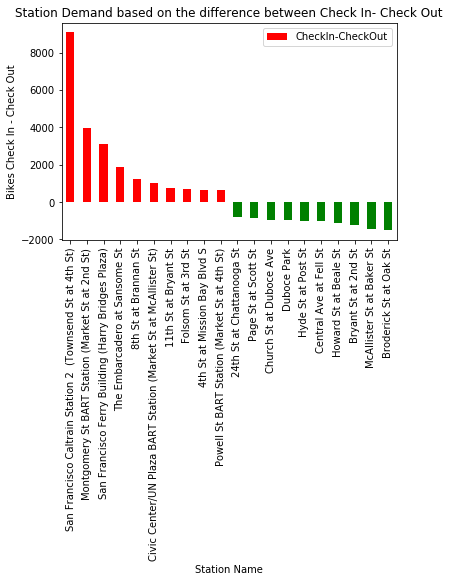

In [22]:
# Top 10 stations show excess bikes at that station, 
# while the bottom 10 stations show they should be monitored for reloading.
import matplotlib.pyplot as plt
from matplotlib import cm

my_colors = 'rrrrrrrrrrgggggggggg'

bike_demand_chart.set_index('Stations').plot(kind='bar', color= my_colors)
plt.ylabel("Bikes Check In - Check Out")
plt.xlabel("Station Name")
plt.title("Station Demand based on the difference between Check In- Check Out");

### Q4 Percentage contribution of top 9 routes in terms of LYFT revenue based on day user type
#### We only find for day user because we cannot find subscriber contribution.
#### This is due to lack of unique identification of user or no information on number of subscribers for the dataset.


In [23]:
# extract only day user data
du_routes= sf_stations[sf_stations['user_type']=='Customer']
du_routes


,month,trip_duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,start_city,end_city
9,January,376,25.0,Howard St at 2nd St,349.0,Howard St at Mary St,3649,Customer,1990.0,Male,37.787522,-122.397405,37.781010,-122.405666,San Francisco,San Francisco
10,January,340,95.0,Sanchez St at 15th St,58.0,Market St at 10th St,5382,Customer,1989.0,Male,37.766219,-122.431060,37.776619,-122.417385,San Francisco,San Francisco
43,January,703,109.0,17th St at Valencia St,61.0,Howard St at 8th St,4980,Customer,1988.0,Male,37.763316,-122.421904,37.776513,-122.411306,San Francisco,San Francisco
50,January,400,20.0,Mechanics Monument Plaza (Market St at Bush St),323.0,Broadway at Kearny,134,Customer,1991.0,Male,37.791300,-122.399051,37.798014,-122.405950,San Francisco,San Francisco
51,January,768,47.0,4th St at Harrison St,130.0,22nd St Caltrain Station,5294,Customer,1994.0,Male,37.780955,-122.399749,37.757718,-122.391813,San Francisco,San Francisco
54,January,415,28.0,The Embarcadero at Bryant St,8.0,The Embarcadero at Vallejo St,2584,Customer,1992.0,Male,37.787168,-122.388098,37.799953,-122.398525,San Francisco,San Francisco
56,January,705,129.0,Harrison St at 20th St,141.0,Valencia St at Cesar Chavez St,4719,Customer,1991.0,Male,37.758862,-122.412544,37.747998,-122.420219,San Francisco,San Francisco
73,January,1002,20.0,Mechanics Monument Plaza (Market St at Bush St),368.0,Myrtle St at Polk St,3721,Customer,1996.0,Male,37.791300,-122.399051,37.785434,-122.419622,San Francisco,San Francisco
77,January,1685,34.0,Father Alfred E Boeddeker Park,70.0,Central Ave at Fell St,5255,Customer,1986.0,Female,37.783988,-122.412408,37.773311,-122.444293,San Francisco,San Francisco
80,January,1303,81.0,Berry St at 4th St,16.0,Steuart St at Market St,2124,Customer,1982.0,Female,37.775880,-122.393170,37.794130,-122.394430,San Francisco,San Francisco


In [24]:
# percentage contribution of day user to total ridership over 5 months
print("Total Number of users (Subscriber + day user): ",sf_stations.shape[0])
print("Number of day users: ",du_routes.shape[0])
print ("Percentage of day user riders out of total riders for 5 months is: ",(du_routes.shape[0]/sf_stations.shape[0])*100, "%" )


Total Number of users (Subscriber + day user):  719010
Number of day users:  88123
Percentage of day user riders out of total riders for 5 months is:  12.256157772492733 %


In [25]:
# function to calculate cost paid by day user
# day user pays $2 for first 30mins and $3 for every subsequent 15 minutes as per LYFT website
# https://www.lyft.com/bikes/bay-wheels/pricing

import math
def Calculate_Cost(x):
   
   
    #first 30 mins free every subsequent 15mins = $3
    if x>1800:
        total_time = x-1800
        if (total_time%900) == 0:
            total_cost = ((total_time/900)*3)+2
        else:
            total_cost = ((math.ceil(total_time/900))*3) + 2
    else:
        total_cost = 2
    return (total_cost)



In [26]:
# apply cost function to dataframe
du_routes['Cost_of_trip']= du_routes['trip_duration_sec'].apply(Calculate_Cost)
du_routes

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,month,trip_duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,start_city,end_city,Cost_of_trip
9,January,376,25.0,Howard St at 2nd St,349.0,Howard St at Mary St,3649,Customer,1990.0,Male,37.787522,-122.397405,37.781010,-122.405666,San Francisco,San Francisco,2.0
10,January,340,95.0,Sanchez St at 15th St,58.0,Market St at 10th St,5382,Customer,1989.0,Male,37.766219,-122.431060,37.776619,-122.417385,San Francisco,San Francisco,2.0
43,January,703,109.0,17th St at Valencia St,61.0,Howard St at 8th St,4980,Customer,1988.0,Male,37.763316,-122.421904,37.776513,-122.411306,San Francisco,San Francisco,2.0
50,January,400,20.0,Mechanics Monument Plaza (Market St at Bush St),323.0,Broadway at Kearny,134,Customer,1991.0,Male,37.791300,-122.399051,37.798014,-122.405950,San Francisco,San Francisco,2.0
51,January,768,47.0,4th St at Harrison St,130.0,22nd St Caltrain Station,5294,Customer,1994.0,Male,37.780955,-122.399749,37.757718,-122.391813,San Francisco,San Francisco,2.0
54,January,415,28.0,The Embarcadero at Bryant St,8.0,The Embarcadero at Vallejo St,2584,Customer,1992.0,Male,37.787168,-122.388098,37.799953,-122.398525,San Francisco,San Francisco,2.0
56,January,705,129.0,Harrison St at 20th St,141.0,Valencia St at Cesar Chavez St,4719,Customer,1991.0,Male,37.758862,-122.412544,37.747998,-122.420219,San Francisco,San Francisco,2.0
73,January,1002,20.0,Mechanics Monument Plaza (Market St at Bush St),368.0,Myrtle St at Polk St,3721,Customer,1996.0,Male,37.791300,-122.399051,37.785434,-122.419622,San Francisco,San Francisco,2.0
77,January,1685,34.0,Father Alfred E Boeddeker Park,70.0,Central Ave at Fell St,5255,Customer,1986.0,Female,37.783988,-122.412408,37.773311,-122.444293,San Francisco,San Francisco,2.0
80,January,1303,81.0,Berry St at 4th St,16.0,Steuart St at Market St,2124,Customer,1982.0,Female,37.775880,-122.393170,37.794130,-122.394430,San Francisco,San Francisco,2.0


In [27]:
# top routes in SF based on frequency of rides (more than 200) for day user
dutrips_df = du_routes.groupby(['start_station_id','end_station_id']).size().reset_index(name = 'number of trips')
top_dutrips = dutrips_df.sort_values('number of trips', ascending=False)
top_dutrips.head()


,start_station_id,end_station_id,number of trips
1113,15.0,6.0,617
15695,377.0,377.0,503
16478,400.0,400.0,360
430,6.0,15.0,353
1237,15.0,371.0,291


In [28]:
top_9_dutrips = top_dutrips[top_dutrips['number of trips']>200]
top_9_dutrips


,start_station_id,end_station_id,number of trips
1113,15.0,6.0,617
15695,377.0,377.0,503
16478,400.0,400.0,360
430,6.0,15.0,353
1237,15.0,371.0,291
16400,399.0,399.0,248
1120,15.0,15.0,237
423,6.0,6.0,228
1249,15.0,400.0,207


#### We see cyclic trips. Seem leisurely
#### Can use the data for target marketing like discount coupons or provide guided tours by collaboration with agencies

In [29]:
# extract data based on the 9 top routes in the day user model
du_route1 = du_routes[(du_routes['start_station_id']== 15) & (sf_stations['end_station_id']==6)]
du_route2 = du_routes[(du_routes['start_station_id']== 377) & (sf_stations['end_station_id']==377)]
du_route3 = du_routes[(du_routes['start_station_id']== 400) & (sf_stations['end_station_id']==400)]
du_route4 = du_routes[(du_routes['start_station_id']== 6) & (sf_stations['end_station_id']==15)]
du_route5 = du_routes[(du_routes['start_station_id']== 15) & (sf_stations['end_station_id']==371)]
du_route6 = du_routes[(du_routes['start_station_id']== 399) & (sf_stations['end_station_id']==399)]
du_route7 = du_routes[(du_routes['start_station_id']== 15) & (sf_stations['end_station_id']==15)]
du_route8 = du_routes[(du_routes['start_station_id']== 6) & (sf_stations['end_station_id']==6)]
du_route9 = du_routes[(du_routes['start_station_id']== 15) & (sf_stations['end_station_id']==400)]


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
//anaco

In [30]:
du_bike_revenue = pd.concat([du_route1, du_route2,du_route3,du_route4,du_route5,du_route6,du_route7,du_route8,du_route9])
du_bike_revenue

,month,trip_duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,start_city,end_city,Cost_of_trip
7370,January,1320,15.0,San Francisco Ferry Building (Harry Bridges Pl...,6.0,The Embarcadero at Sansome St,1442,Customer,1999.0,Male,37.795392,-122.394203,37.804770,-122.403234,San Francisco,San Francisco,2.0
7375,January,1297,15.0,San Francisco Ferry Building (Harry Bridges Pl...,6.0,The Embarcadero at Sansome St,2720,Customer,1999.0,Male,37.795392,-122.394203,37.804770,-122.403234,San Francisco,San Francisco,2.0
7376,January,1278,15.0,San Francisco Ferry Building (Harry Bridges Pl...,6.0,The Embarcadero at Sansome St,2008,Customer,1999.0,Male,37.795392,-122.394203,37.804770,-122.403234,San Francisco,San Francisco,2.0
15589,January,1761,15.0,San Francisco Ferry Building (Harry Bridges Pl...,6.0,The Embarcadero at Sansome St,5575,Customer,1980.0,Female,37.795392,-122.394203,37.804770,-122.403234,San Francisco,San Francisco,2.0
17588,January,360,15.0,San Francisco Ferry Building (Harry Bridges Pl...,6.0,The Embarcadero at Sansome St,1150,Customer,1985.0,Female,37.795392,-122.394203,37.804770,-122.403234,San Francisco,San Francisco,2.0
18042,January,469,15.0,San Francisco Ferry Building (Harry Bridges Pl...,6.0,The Embarcadero at Sansome St,3224,Customer,1994.0,Female,37.795392,-122.394203,37.804770,-122.403234,San Francisco,San Francisco,2.0
27193,January,1058,15.0,San Francisco Ferry Building (Harry Bridges Pl...,6.0,The Embarcadero at Sansome St,62,Customer,1990.0,Female,37.795392,-122.394203,37.804770,-122.403234,San Francisco,San Francisco,2.0
28049,January,653,15.0,San Francisco Ferry Building (Harry Bridges Pl...,6.0,The Embarcadero at Sansome St,133,Customer,1973.0,Male,37.795392,-122.394203,37.804770,-122.403234,San Francisco,San Francisco,2.0
28995,January,425,15.0,San Francisco Ferry Building (Harry Bridges Pl...,6.0,The Embarcadero at Sansome St,5019,Customer,1985.0,Female,37.795392,-122.394203,37.804770,-122.403234,San Francisco,San Francisco,2.0
29808,January,485,15.0,San Francisco Ferry Building (Harry Bridges Pl...,6.0,The Embarcadero at Sansome St,3510,Customer,1994.0,Female,37.795392,-122.394203,37.804770,-122.403234,San Francisco,San Francisco,2.0


In [31]:
# calculate the revenue from day users of top 9 routes in 5 months
top9_routes= du_bike_revenue['Cost_of_trip'].sum()
top9_routes

18766.0

In [32]:
# calculate the revenue from total day users in 5 months
total_du_revenue= du_routes['Cost_of_trip'].sum()
total_du_revenue

283160.0

In [33]:
remaining_routes= (du_routes['Cost_of_trip'].sum())-(du_bike_revenue['Cost_of_trip'].sum())
remaining_routes

264394.0

In [34]:
# percentage contribution wrt revenue generation of day user to total day user ridership over 5 months
print("Total revenue generation by day user for 5 months): ",total_du_revenue)
print("Total revenue generation by day user for top 9 routes in 5 months):",top9_routes)
print ("Percentage of revenue contribution of day user riders to total for 5 months is: ",(top9_routes/total_du_revenue)*100, "%" )


Total revenue generation by day user for 5 months):  283160.0
Total revenue generation by day user for top 9 routes in 5 months): 18766.0
Percentage of revenue contribution of day user riders to total for 5 months is:  6.627348495550218 %


#### 6.62% is the percentage contribution to revenue generation for SF Day users bike sharing

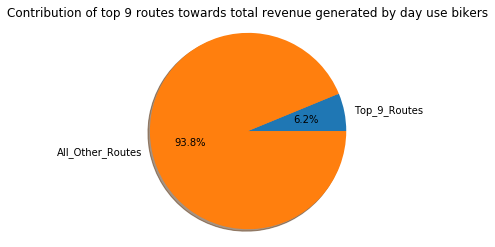

In [35]:
dutrip_cost = [18766,283160]
indiv_index= ('Top_9_Routes', 'All_Other_Routes')
cost_occurence = pd.Series(index = indiv_index, data = dutrip_cost)

#we create the figure
scatter_plot = plt.figure()

#we create the subplot
axes1 = scatter_plot.add_subplot(1,1,1)

#We use the Series data and index to create the pie chart
axes1.pie(cost_occurence.values,
          labels = cost_occurence.index, 
          autopct='%1.1f%%', shadow = True)

axes1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

axes1.set_title('Contribution of top 9 routes towards total revenue generated by day use bikers')

plt.show()